<a href="https://colab.research.google.com/github/ThalitaCoelhoAguiar/meus-notebooks-colab/blob/main/Trab1_Top_Mat2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho Tópicos
### Thalita Coelho Aguiar/ 222030324


Objetivo: Determinar a espécie de uma muda a partir de uma imagem
Utilizado: CNN simples com framework Keras


In [ ]:
# Importando bibliotecas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

### Importando o Dataset

Dataset consiste em e mudas de plantas e contém imagens de aproximadamente 960 plantas
únicas pertencentes a 12 espécies em vários estágios de crescimento. Ele compreende imagens RGB anotadas
com uma resolução física de aproximadamente 10 pixels por mm.


*   Importando diretamente do Kaggle
* Escolher arquivo kaggle.json



In [ ]:
!pip install -q kaggle
from google.colab import files

In [ ]:
files.upload() #escolha o arquivo kaggle.json,

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thalitakaggle","key":"902124f8be51004a74dea37b539dba39"}'}

In [ ]:
# Criar a pasta .kaggle e mover o kaggle.json para pasta
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c plant-seedlings-classification # Baixar o Dataset
!unzip plant-seedlings-classification.zip -d plant-seedlings-dataset #Descompactar dados

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: plant-seedlings-dataset/test/ad12382d4.png  
  inflating: plant-seedlings-dataset/test/adb7a032c.png  
  inflating: plant-seedlings-dataset/test/ae90f2827.png  
  inflating: plant-seedlings-dataset/test/aecfaed64.png  
  inflating: plant-seedlings-dataset/test/aee6fa3df.png  
  inflating: plant-seedlings-dataset/test/af45e222a.png  
  inflating: plant-seedlings-dataset/test/afa446484.png  
  inflating: plant-seedlings-dataset/test/afcf6abd5.png  
  inflating: plant-seedlings-dataset/test/b026bf8ca.png  
  inflating: plant-seedlings-dataset/test/b03397525.png  
  inflating: plant-seedlings-dataset/test/b0acaff4a.png  
  inflating: plant-seedlings-dataset/test/b130a0632.png  
  inflating: plant-seedlings-dataset/test/b145ba9d4.png  
  inflating: plant-seedlings-dataset/test/b1cd2a91e.png  
  inflating: plant-seedlings-dataset/test/b215531dd.png  
  inflating: plant-seedlings-dataset/test/b2706e2b3.png  
  inflating: 

### Preparar os dados do Treinamento e Teste

In [ ]:
# Pré-processamento das imagens
train_datagen = ImageDataGenerator(rescale=1./255) #normaliza os valores dos pixels da imagem
test_datagen = ImageDataGenerator(rescale=1./255) #normaliza os valores dos pixels da imagem

# Criar geradores para os dados de treino
train_generator = train_datagen.flow_from_directory(
    'plant-seedlings-dataset/train',
    target_size=(150, 150), # o gerador redimensiona cada imagem para (150, 150)
    batch_size=32, #entrega em lotes de 32 imagens por vez para o modelo
    class_mode='categorical'
)
# Criar geradores para os dados de treino
test_generator = test_datagen.flow_from_directory(
    'plant-seedlings-dataset/train',
    target_size=(150, 150),# o gerador redimensiona cada imagem para (150, 150)
    batch_size=32, #entrega em lotes de 32 imagens por vez para o modelo
    class_mode='categorical'
)

Found 4750 images belonging to 12 classes.
Found 4750 images belonging to 12 classes.


### Definindo arquitetura

#### Vai ser utilizado o framework do `Keras` para construir a rede neural. Foram construidas as camadas da a rede neural através do `Sequential()`. Foi escolhida uma CNN simples para essa análise para verificar o maior proveito de uma rede neural mais simples.

In [ ]:
model = Sequential([
    # Primeira camada convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)), #Reduz a dimensionalidade das imagens
    Dropout(0.2),  #desativa 20% das ativações de forma aleatória durante o treinamento.

    Conv2D(64, (3, 3), activation='relu'), # Segunda camada convolucional
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'), # Terceira camada convolucional
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation='relu'), # Quarta camada convolucional
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),


    Flatten(), # Achatar as saídas das camadas convolucionais

    Dense(256, activation='relu'), # Camada totalmente conectada
    Dropout(0,5),

    Dense(12, activation='softmax')  # Camada de saída para classificação das 12 classes
])

Para a otimização, foram adicionados os parâmetros como dropout , que desativa parte das ativações de forma aleatória durante o treinamento.
para evitar overfitting. A quantidade de camadas foi escolhida para garantir que o modelo aprenda de forma adequada, considerando sua simplicidade.

Outros parâmetros como funçoes de ativação relu e softmax foram utilizadas

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 12)                  │           3,084 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,603,020 (13.74 MB)

 Trainable params: 3,603,020 (13.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilar o modelo para o treinamentos ou teste
model.compile(
    optimizer='adam', #ot imizador para minimizar a função perda e ajustar os pesos do modelo
    loss='categorical_crossentropy',#função perda
    metrics=['accuracy']
)

O otimizador adam  é um bom otimizador

A função perda categorical_crossentropy é adequado para a classificação multiclasse imagens.

In [ ]:
epochs = 10

model_history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs,
)

Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 399s 3s/step - accuracy: 0.1695 - loss: 2.3675 - val_accuracy: 0.4608 - val_loss: 1.6179
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 440s 3s/step - accuracy: 0.4721 - loss: 1.5177 - val_accuracy: 0.6200 - val_loss: 1.0668
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 441s 3s/step - accuracy: 0.6481 - loss: 1.0103 - val_accuracy: 0.6423 - val_loss: 1.0458
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 387s 3s/step - accuracy: 0.7264 - loss: 0.7927 - val_accuracy: 0.7773 - val_loss: 0.6265
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 389s 3s/step - accuracy: 0.7916 - loss: 0.6115 - val_accuracy: 0.7954 - val_loss: 0.5940
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 445s 3s/step - accuracy: 0.8163 - loss: 0.5256 - val_accuracy: 0.8800 - val_loss: 0.3794
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 440s 3s/step - accuracy: 0.8529 - loss: 0.4192 - val_accuracy: 0.9145 - val_loss: 0.2716
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 443s 3s/step - accuracy: 0.8744 - loss: 0.3483 - val_accu

Houve uma acurácia de 94% nos dados de teste e 90% nos dados de treinamento, indicando que o modelo aprendeu bem e conseguiu generalizar para classificar dados novos. Com o passar das épocas, foi possível observar que a acurácia aumentava enquanto a variável de perda diminuía, evidenciando o aprendizado ao longo do treinamento. Cada vez que o modelo é treinado, pode ocorrer uma variação na acurácia final, pois os dados de treinamento são embaralhados de forma aleatória, e os pesos iniciais do modelo são calculados aleatoriamente.
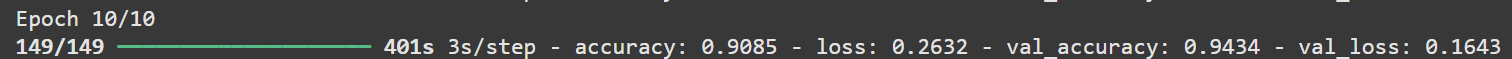



### Curvas de Treinamento e acurâcia

São importantes para analisar se o modelo está de fato aprendendo e  é possível inferir se está havendo undefitting ou overfitting

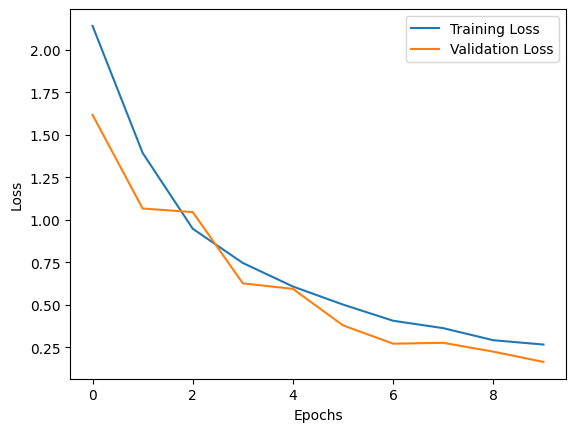

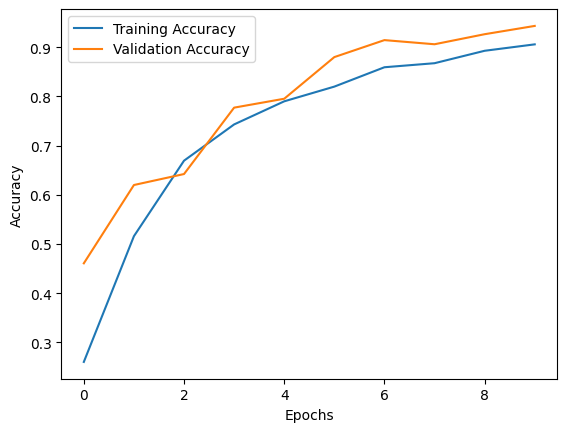

In [ ]:
# Plotar perda (loss)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotar acurácia
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**# Predição utilizando imagens testes**

Escolher uma imagem aletória de um lote aleatório e fazer predição com o modelo contruído. Depois mostrar a imagem aleatória escolhida, sua predição e seu rótulo verdadeiro.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


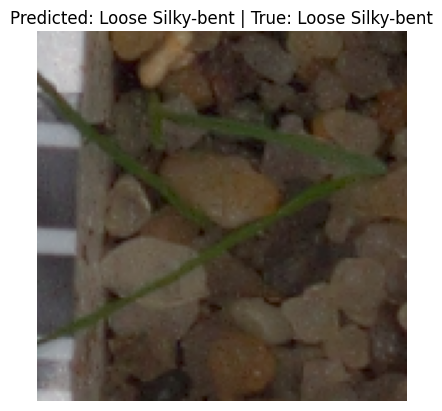

In [ ]:
batch_images, batch_labels = next(train_generator) # Obter um lote do gerador existente

# Escolher uma imagem aleatória do lote
random_idx = np.random.randint(0, len(batch_images))
random_image = batch_images[random_idx]
true_label = np.argmax(batch_labels[random_idx])  # Rótulo verdadeiro

# Fazer a predição
predictions = model.predict(np.expand_dims(random_image, axis=0))
predicted_class = np.argmax(predictions)  # Classe prevista

# Mapear índices para nomes das classes
class_indices = {v: k for k, v in train_generator.class_indices.items()}
predicted_label_name = class_indices[predicted_class]
true_label_name = class_indices[true_label]

# Mostrar a imagem com a predição e o rótulo verdadeiro
plt.imshow(random_image)
plt.axis('off')
plt.title(f"Predicted: {predicted_label_name} | True: {true_label_name}")
plt.show()